# Setup

## Import modules

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import global variables and plotting functions

In [2]:
sys.path.insert(0, '..')

# global vars
from util_scripts.plotting_fcts_and_vars import years, growth_boroughs, boroughs, west_boroughs, columns, types

# plotting per borrough
from util_scripts.plotting_fcts_and_vars import plot_boroughs, plot_all_boroughs

# plotting stations data
from util_scripts.plotting_fcts_and_vars import plot_stations, plot_stations_changes

# plotting global vars
from util_scripts.plotting_fcts_and_vars import FIGSIZE, YEAR_XLABEL, PLOTS_DIR, GROWTH_MULTIPLIER, POINT_CHANGE

sys.path.insert(0, './notebooks')

# Number of restaurants by borough

In [3]:
# load
restaurants_units = pd.read_excel("../data/restaurants-cafes-borough.xls", sheet_name="Restaurants units", skiprows=4, names=columns)

# remove missing values
restaurants_units.dropna(axis=0, inplace=True)
restaurants_units.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,5455.0,5525.0,5540.0,5575.0,5915.0,5940.0,6175.0,5985.0,5910.0,6175.0,6210.0,6655.0,6715.0,7035.0,7515.0,7745.0,7990.0
1,E09000001,City of London,180.0,190.0,190.0,175.0,180.0,170.0,205.0,185.0,180.0,195.0,190.0,205.0,230.0,255.0,270.0,270.0,295.0
2,E09000002,Barking and Dagenham,30.0,30.0,30.0,35.0,35.0,35.0,35.0,35.0,30.0,30.0,30.0,40.0,40.0,35.0,45.0,40.0,35.0
3,E09000003,Barnet,205.0,195.0,200.0,200.0,200.0,200.0,205.0,195.0,210.0,215.0,205.0,235.0,250.0,240.0,255.0,245.0,270.0
4,E09000004,Bexley,85.0,80.0,75.0,80.0,85.0,95.0,95.0,95.0,90.0,95.0,95.0,105.0,105.0,105.0,100.0,110.0,110.0


## Values for growth boroughs

In [4]:
restaurants_units_boroughs = restaurants_units[restaurants_units['Area name'].isin(growth_boroughs)]
restaurants_units_boroughs

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,30.0,30.0,30.0,35.0,35.0,35.0,35.0,35.0,30.0,30.0,30.0,40.0,40.0,35.0,45.0,40.0,35.0
11,E09000011,Greenwich,70.0,75.0,65.0,75.0,70.0,75.0,90.0,95.0,90.0,100.0,100.0,120.0,125.0,120.0,125.0,140.0,145.0
12,E09000012,Hackney,95.0,100.0,100.0,110.0,110.0,120.0,120.0,130.0,120.0,125.0,140.0,160.0,165.0,180.0,230.0,245.0,285.0
25,E09000025,Newham,45.0,55.0,50.0,60.0,75.0,85.0,85.0,80.0,75.0,80.0,75.0,95.0,110.0,110.0,120.0,120.0,125.0
30,E09000030,Tower Hamlets,135.0,160.0,165.0,175.0,175.0,180.0,200.0,195.0,210.0,215.0,215.0,245.0,260.0,285.0,300.0,320.0,320.0
31,E09000031,Waltham Forest,75.0,70.0,65.0,65.0,85.0,80.0,85.0,80.0,65.0,75.0,80.0,95.0,95.0,95.0,115.0,125.0,135.0


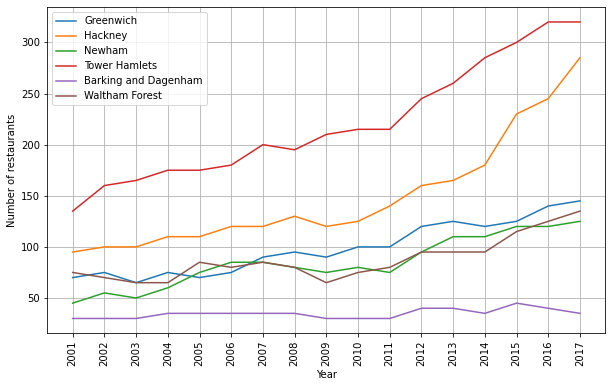

In [5]:
plot_boroughs(restaurants_units_boroughs)
plt.ylabel('Number of restaurants')

plt.savefig(f'{PLOTS_DIR}/restaurants_units_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [6]:
multipliers_2005 = restaurants_units[years].div(restaurants_units["2005"], axis=0)
multipliers_2005 = pd.concat([restaurants_units.iloc[:, :2], multipliers_2005], axis=1)
multipliers_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.922232,0.934066,0.936602,0.942519,1.0,1.004227,1.043956,1.011834,0.999155,1.043956,1.049873,1.125106,1.135249,1.189349,1.270499,1.309383,1.350803
1,E09000001,City of London,1.000000,1.055556,1.055556,0.972222,1.0,0.944444,1.138889,1.027778,1.000000,1.083333,1.055556,1.138889,1.277778,1.416667,1.500000,1.500000,1.638889
2,E09000002,Barking and Dagenham,0.857143,0.857143,0.857143,1.000000,1.0,1.000000,1.000000,1.000000,0.857143,0.857143,0.857143,1.142857,1.142857,1.000000,1.285714,1.142857,1.000000
3,E09000003,Barnet,1.025000,0.975000,1.000000,1.000000,1.0,1.000000,1.025000,0.975000,1.050000,1.075000,1.025000,1.175000,1.250000,1.200000,1.275000,1.225000,1.350000
4,E09000004,Bexley,1.000000,0.941176,0.882353,0.941176,1.0,1.117647,1.117647,1.117647,1.058824,1.117647,1.117647,1.235294,1.235294,1.235294,1.176471,1.294118,1.294118


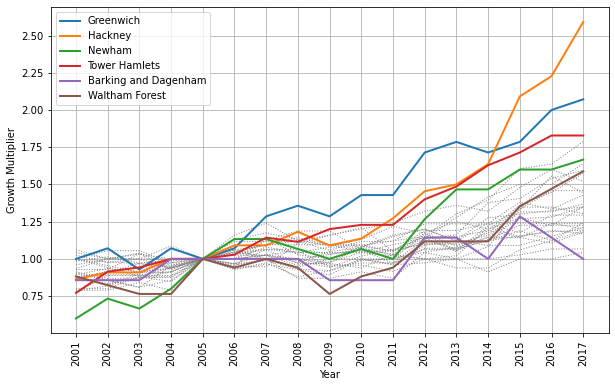

In [7]:
plot_all_boroughs(multipliers_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/restaurants_units_multiplier_2005')
plt.show()

In [8]:
multipliers_2005 = restaurants_units[years].div(restaurants_units["2005"], axis=0)
percentage_changes_num_2005 = multipliers_2005.sub(1)
percentage_changes_2005 = pd.concat([restaurants_units.iloc[:, :2], percentage_changes_num_2005], axis=1)
percentage_changes_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,-0.077768,-0.065934,-0.063398,-0.057481,0.0,0.004227,0.043956,0.011834,-0.000845,0.043956,0.049873,0.125106,0.135249,0.189349,0.270499,0.309383,0.350803
1,E09000001,City of London,0.000000,0.055556,0.055556,-0.027778,0.0,-0.055556,0.138889,0.027778,0.000000,0.083333,0.055556,0.138889,0.277778,0.416667,0.500000,0.500000,0.638889
2,E09000002,Barking and Dagenham,-0.142857,-0.142857,-0.142857,0.000000,0.0,0.000000,0.000000,0.000000,-0.142857,-0.142857,-0.142857,0.142857,0.142857,0.000000,0.285714,0.142857,0.000000
3,E09000003,Barnet,0.025000,-0.025000,0.000000,0.000000,0.0,0.000000,0.025000,-0.025000,0.050000,0.075000,0.025000,0.175000,0.250000,0.200000,0.275000,0.225000,0.350000
4,E09000004,Bexley,0.000000,-0.058824,-0.117647,-0.058824,0.0,0.117647,0.117647,0.117647,0.058824,0.117647,0.117647,0.235294,0.235294,0.235294,0.176471,0.294118,0.294118


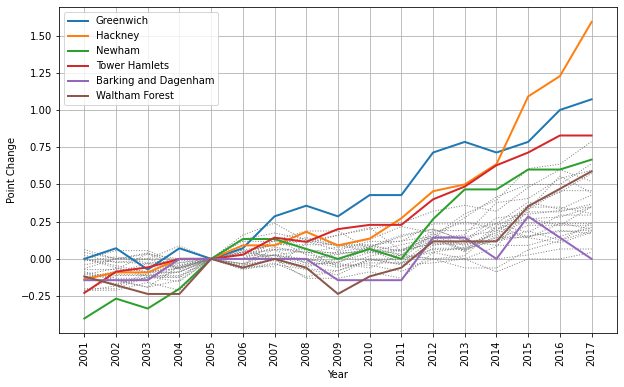

In [9]:
plot_all_boroughs(percentage_changes_2005)
plt.ylabel(POINT_CHANGE)

plt.savefig(f'{PLOTS_DIR}/restaurants_units_point_change_2005')
plt.show()

## Changes (baseline 2011)

In [10]:
multipliers_2011 = restaurants_units[years].div(restaurants_units["2011"], axis=0)
multipliers_2011 = pd.concat([restaurants_units.iloc[:, :2], multipliers_2011], axis=1)
multipliers_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.878422,0.889694,0.892110,0.897746,0.952496,0.956522,0.994364,0.963768,0.951691,0.994364,1.0,1.071659,1.081320,1.132850,1.210145,1.247182,1.286634
1,E09000001,City of London,0.947368,1.000000,1.000000,0.921053,0.947368,0.894737,1.078947,0.973684,0.947368,1.026316,1.0,1.078947,1.210526,1.342105,1.421053,1.421053,1.552632
2,E09000002,Barking and Dagenham,1.000000,1.000000,1.000000,1.166667,1.166667,1.166667,1.166667,1.166667,1.000000,1.000000,1.0,1.333333,1.333333,1.166667,1.500000,1.333333,1.166667
3,E09000003,Barnet,1.000000,0.951220,0.975610,0.975610,0.975610,0.975610,1.000000,0.951220,1.024390,1.048780,1.0,1.146341,1.219512,1.170732,1.243902,1.195122,1.317073
4,E09000004,Bexley,0.894737,0.842105,0.789474,0.842105,0.894737,1.000000,1.000000,1.000000,0.947368,1.000000,1.0,1.105263,1.105263,1.105263,1.052632,1.157895,1.157895


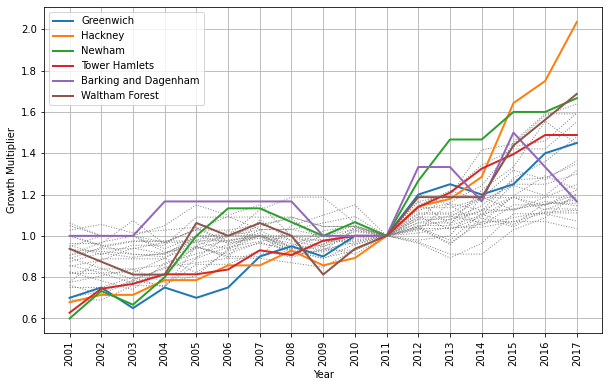

In [11]:
plot_all_boroughs(multipliers_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/restaurants_units_multiplier_2011')
plt.show()

In [12]:
multipliers_2011 = restaurants_units[years].div(restaurants_units["2011"], axis=0)
percentage_changes_num_2011 = multipliers_2011.sub(1)
percentage_changes_2011 = pd.concat([restaurants_units.iloc[:, :2], percentage_changes_num_2011], axis=1)
percentage_changes_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,-0.121578,-0.110306,-0.107890,-0.102254,-0.047504,-0.043478,-0.005636,-0.036232,-0.048309,-0.005636,0.0,0.071659,0.081320,0.132850,0.210145,0.247182,0.286634
1,E09000001,City of London,-0.052632,0.000000,0.000000,-0.078947,-0.052632,-0.105263,0.078947,-0.026316,-0.052632,0.026316,0.0,0.078947,0.210526,0.342105,0.421053,0.421053,0.552632
2,E09000002,Barking and Dagenham,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.0,0.333333,0.333333,0.166667,0.500000,0.333333,0.166667
3,E09000003,Barnet,0.000000,-0.048780,-0.024390,-0.024390,-0.024390,-0.024390,0.000000,-0.048780,0.024390,0.048780,0.0,0.146341,0.219512,0.170732,0.243902,0.195122,0.317073
4,E09000004,Bexley,-0.105263,-0.157895,-0.210526,-0.157895,-0.105263,0.000000,0.000000,0.000000,-0.052632,0.000000,0.0,0.105263,0.105263,0.105263,0.052632,0.157895,0.157895


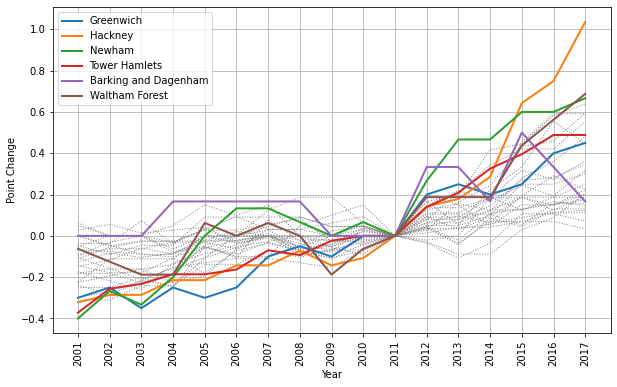

In [13]:
plot_all_boroughs(percentage_changes_2011)
plt.ylabel(POINT_CHANGE)

plt.savefig(f'{PLOTS_DIR}/restaurants_units_point_change_2011')
plt.show()

# Number of restaurant employees by borough

In [14]:
# load
restaurants_employees = pd.read_excel("../data/restaurants-cafes-borough.xls", sheet_name="Restaurants employment", skiprows=4, names=columns)

# remove missing values
restaurants_employees.dropna(axis=0, inplace=True)
restaurants_employees.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,63800.0,69800.0,70900.0,69100.0,71400.0,71400.0,71500.0,68300.0,71100.0,79000.0,83600.0,90700.0,95300.0,104000.0,112800.0,118600.0,124500.0
1,E09000001,City of London,2400.0,2900.0,3100.0,2900.0,3000.0,2900.0,3100.0,2800.0,2900.0,3200.0,3200.0,3700.0,4200.0,5200.0,5900.0,6700.0,6800.0
2,E09000002,Barking and Dagenham,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,200.0,300.0,300.0,300.0,300.0,300.0,300.0,400.0,300.0
3,E09000003,Barnet,1600.0,1600.0,1600.0,1500.0,1500.0,1500.0,1700.0,1400.0,2100.0,2300.0,1700.0,1800.0,2100.0,2200.0,2400.0,2400.0,2900.0
4,E09000004,Bexley,800.0,800.0,800.0,800.0,700.0,800.0,800.0,600.0,600.0,700.0,800.0,800.0,800.0,800.0,800.0,1000.0,1000.0


## Values for growth boroughs

In [15]:
restaurants_employees_boroughs = restaurants_employees[restaurants_employees['Area name'].isin(growth_boroughs)]
restaurants_employees_boroughs

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,E09000002,Barking and Dagenham,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,200.0,300.0,300.0,300.0,300.0,300.0,300.0,400.0,300.0
11,E09000011,Greenwich,700.0,700.0,600.0,700.0,800.0,700.0,800.0,700.0,800.0,1000.0,1200.0,1500.0,1700.0,1500.0,1700.0,1900.0,2000.0
12,E09000012,Hackney,600.0,600.0,800.0,900.0,900.0,1000.0,900.0,1100.0,1200.0,1400.0,1800.0,2100.0,2300.0,2700.0,3700.0,4000.0,4700.0
25,E09000025,Newham,400.0,500.0,500.0,600.0,500.0,700.0,700.0,700.0,700.0,900.0,900.0,1100.0,1600.0,2200.0,2300.0,2400.0,2300.0
30,E09000030,Tower Hamlets,1300.0,1800.0,1900.0,1600.0,1700.0,1900.0,1900.0,1900.0,2200.0,2400.0,2800.0,3100.0,3300.0,4000.0,4600.0,5000.0,5200.0
31,E09000031,Waltham Forest,500.0,500.0,500.0,400.0,500.0,400.0,500.0,500.0,400.0,500.0,600.0,600.0,600.0,600.0,700.0,900.0,1100.0


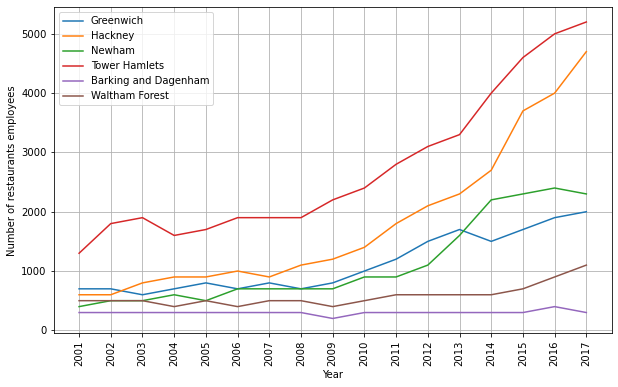

In [16]:
plot_boroughs(restaurants_employees_boroughs)
plt.ylabel('Number of restaurants employees')

plt.savefig(f'{PLOTS_DIR}/restaurants_employees_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [17]:
multipliers_2005 = restaurants_employees[years].div(restaurants_employees["2005"], axis=0)
multipliers_2005 = pd.concat([restaurants_employees.iloc[:, :2], multipliers_2005], axis=1)
multipliers_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.893557,0.977591,0.992997,0.967787,1.0,1.000000,1.001401,0.956583,0.995798,1.106443,1.170868,1.270308,1.334734,1.456583,1.579832,1.661064,1.743697
1,E09000001,City of London,0.800000,0.966667,1.033333,0.966667,1.0,0.966667,1.033333,0.933333,0.966667,1.066667,1.066667,1.233333,1.400000,1.733333,1.966667,2.233333,2.266667
2,E09000002,Barking and Dagenham,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.333333,1.000000
3,E09000003,Barnet,1.066667,1.066667,1.066667,1.000000,1.0,1.000000,1.133333,0.933333,1.400000,1.533333,1.133333,1.200000,1.400000,1.466667,1.600000,1.600000,1.933333
4,E09000004,Bexley,1.142857,1.142857,1.142857,1.142857,1.0,1.142857,1.142857,0.857143,0.857143,1.000000,1.142857,1.142857,1.142857,1.142857,1.142857,1.428571,1.428571


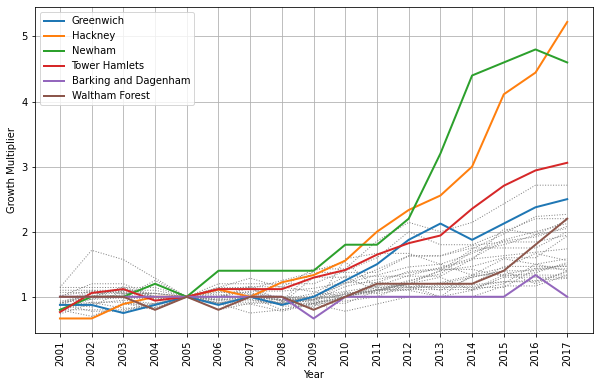

In [18]:
plot_all_boroughs(multipliers_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/restaurants_employees_multiplier_2005')
plt.show()

In [19]:
multipliers_2005 = restaurants_employees[years].div(restaurants_employees["2005"], axis=0)
percentage_changes_num_2005 = multipliers_2005.sub(1)
percentage_changes_2005 = pd.concat([restaurants_employees.iloc[:, :2], percentage_changes_num_2005], axis=1)
percentage_changes_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,-0.106443,-0.022409,-0.007003,-0.032213,0.0,0.000000,0.001401,-0.043417,-0.004202,0.106443,0.170868,0.270308,0.334734,0.456583,0.579832,0.661064,0.743697
1,E09000001,City of London,-0.200000,-0.033333,0.033333,-0.033333,0.0,-0.033333,0.033333,-0.066667,-0.033333,0.066667,0.066667,0.233333,0.400000,0.733333,0.966667,1.233333,1.266667
2,E09000002,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
3,E09000003,Barnet,0.066667,0.066667,0.066667,0.000000,0.0,0.000000,0.133333,-0.066667,0.400000,0.533333,0.133333,0.200000,0.400000,0.466667,0.600000,0.600000,0.933333
4,E09000004,Bexley,0.142857,0.142857,0.142857,0.142857,0.0,0.142857,0.142857,-0.142857,-0.142857,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.428571,0.428571


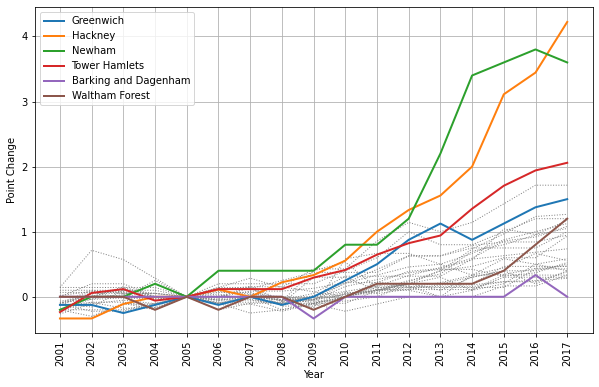

In [20]:
plot_all_boroughs(percentage_changes_2005)
plt.ylabel(POINT_CHANGE)

plt.savefig(f'{PLOTS_DIR}/restaurants_employees_point_change_2005')
plt.show()

## Changes (baseline 2011)

In [21]:
multipliers_2011 = restaurants_employees[years].div(restaurants_employees["2011"], axis=0)
multipliers_2011 = pd.concat([restaurants_employees.iloc[:, :2], multipliers_2011], axis=1)
multipliers_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,0.763158,0.834928,0.848086,0.826555,0.854067,0.854067,0.855263,0.816986,0.850478,0.944976,1.0,1.084928,1.139952,1.244019,1.349282,1.418660,1.489234
1,E09000001,City of London,0.750000,0.906250,0.968750,0.906250,0.937500,0.906250,0.968750,0.875000,0.906250,1.000000,1.0,1.156250,1.312500,1.625000,1.843750,2.093750,2.125000
2,E09000002,Barking and Dagenham,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.333333,1.000000
3,E09000003,Barnet,0.941176,0.941176,0.941176,0.882353,0.882353,0.882353,1.000000,0.823529,1.235294,1.352941,1.0,1.058824,1.235294,1.294118,1.411765,1.411765,1.705882
4,E09000004,Bexley,1.000000,1.000000,1.000000,1.000000,0.875000,1.000000,1.000000,0.750000,0.750000,0.875000,1.0,1.000000,1.000000,1.000000,1.000000,1.250000,1.250000


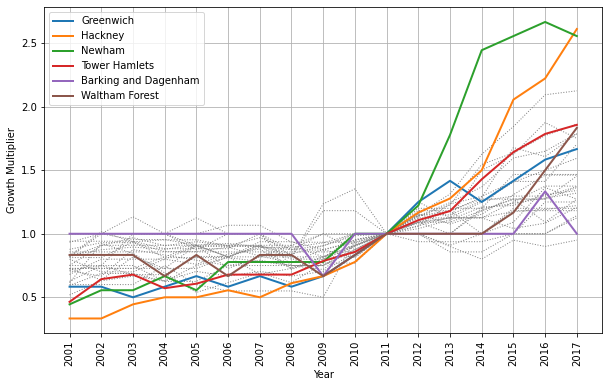

In [22]:
plot_all_boroughs(multipliers_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/restaurants_employees_multiplier_2011')
plt.show()

In [23]:
multipliers_2011 = restaurants_employees[years].div(restaurants_employees["2011"], axis=0)
percentage_changes_num_2011 = multipliers_2011.sub(1)
percentage_changes_2011 = pd.concat([restaurants_employees.iloc[:, :2], percentage_changes_num_2011], axis=1)
percentage_changes_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,-0.236842,-0.165072,-0.151914,-0.173445,-0.145933,-0.145933,-0.144737,-0.183014,-0.149522,-0.055024,0.0,0.084928,0.139952,0.244019,0.349282,0.418660,0.489234
1,E09000001,City of London,-0.250000,-0.093750,-0.031250,-0.093750,-0.062500,-0.093750,-0.031250,-0.125000,-0.093750,0.000000,0.0,0.156250,0.312500,0.625000,0.843750,1.093750,1.125000
2,E09000002,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
3,E09000003,Barnet,-0.058824,-0.058824,-0.058824,-0.117647,-0.117647,-0.117647,0.000000,-0.176471,0.235294,0.352941,0.0,0.058824,0.235294,0.294118,0.411765,0.411765,0.705882
4,E09000004,Bexley,0.000000,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,-0.250000,-0.250000,-0.125000,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000


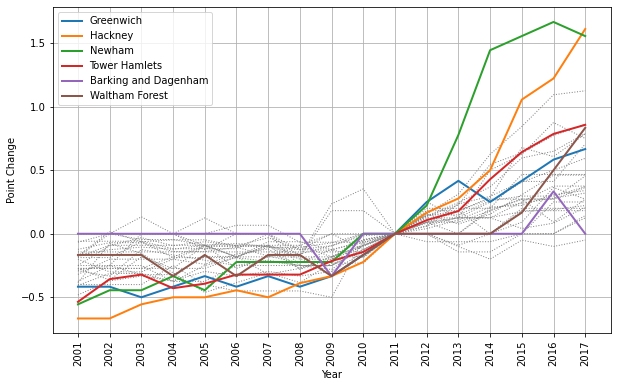

In [24]:
plot_all_boroughs(percentage_changes_2011)
plt.ylabel(POINT_CHANGE)

plt.savefig(f'{PLOTS_DIR}/restaurants_employees_point_change_2011')
plt.show()